In [3]:
%cd /content/drive/MyDrive/Github/bank-churn

/content/drive/MyDrive/Github/bank-churn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("./dataset/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
df["Satisfaction Score"]=df["Satisfaction Score"].astype(object)

In [9]:
cat=[]
for col in df.columns:
  if(df[col].dtype==object):
    cat.append(col)
    print(col)
    print(df[col].unique())
print("cat: ",cat)
metric=[col for col in df.columns if col not in cat]
print("metric: ",metric)

Geography
['France' 'Spain' 'Germany']
Gender
['Female' 'Male']
Satisfaction Score
[2 3 5 4 1]
Card Type
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
cat:  ['Geography', 'Gender', 'Satisfaction Score', 'Card Type']
metric:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Point Earned']


In [10]:
group=df.groupby('Exited')
exited=group.get_group(1)
not_exited=group.get_group(0)

In [11]:
len(df.columns)

15

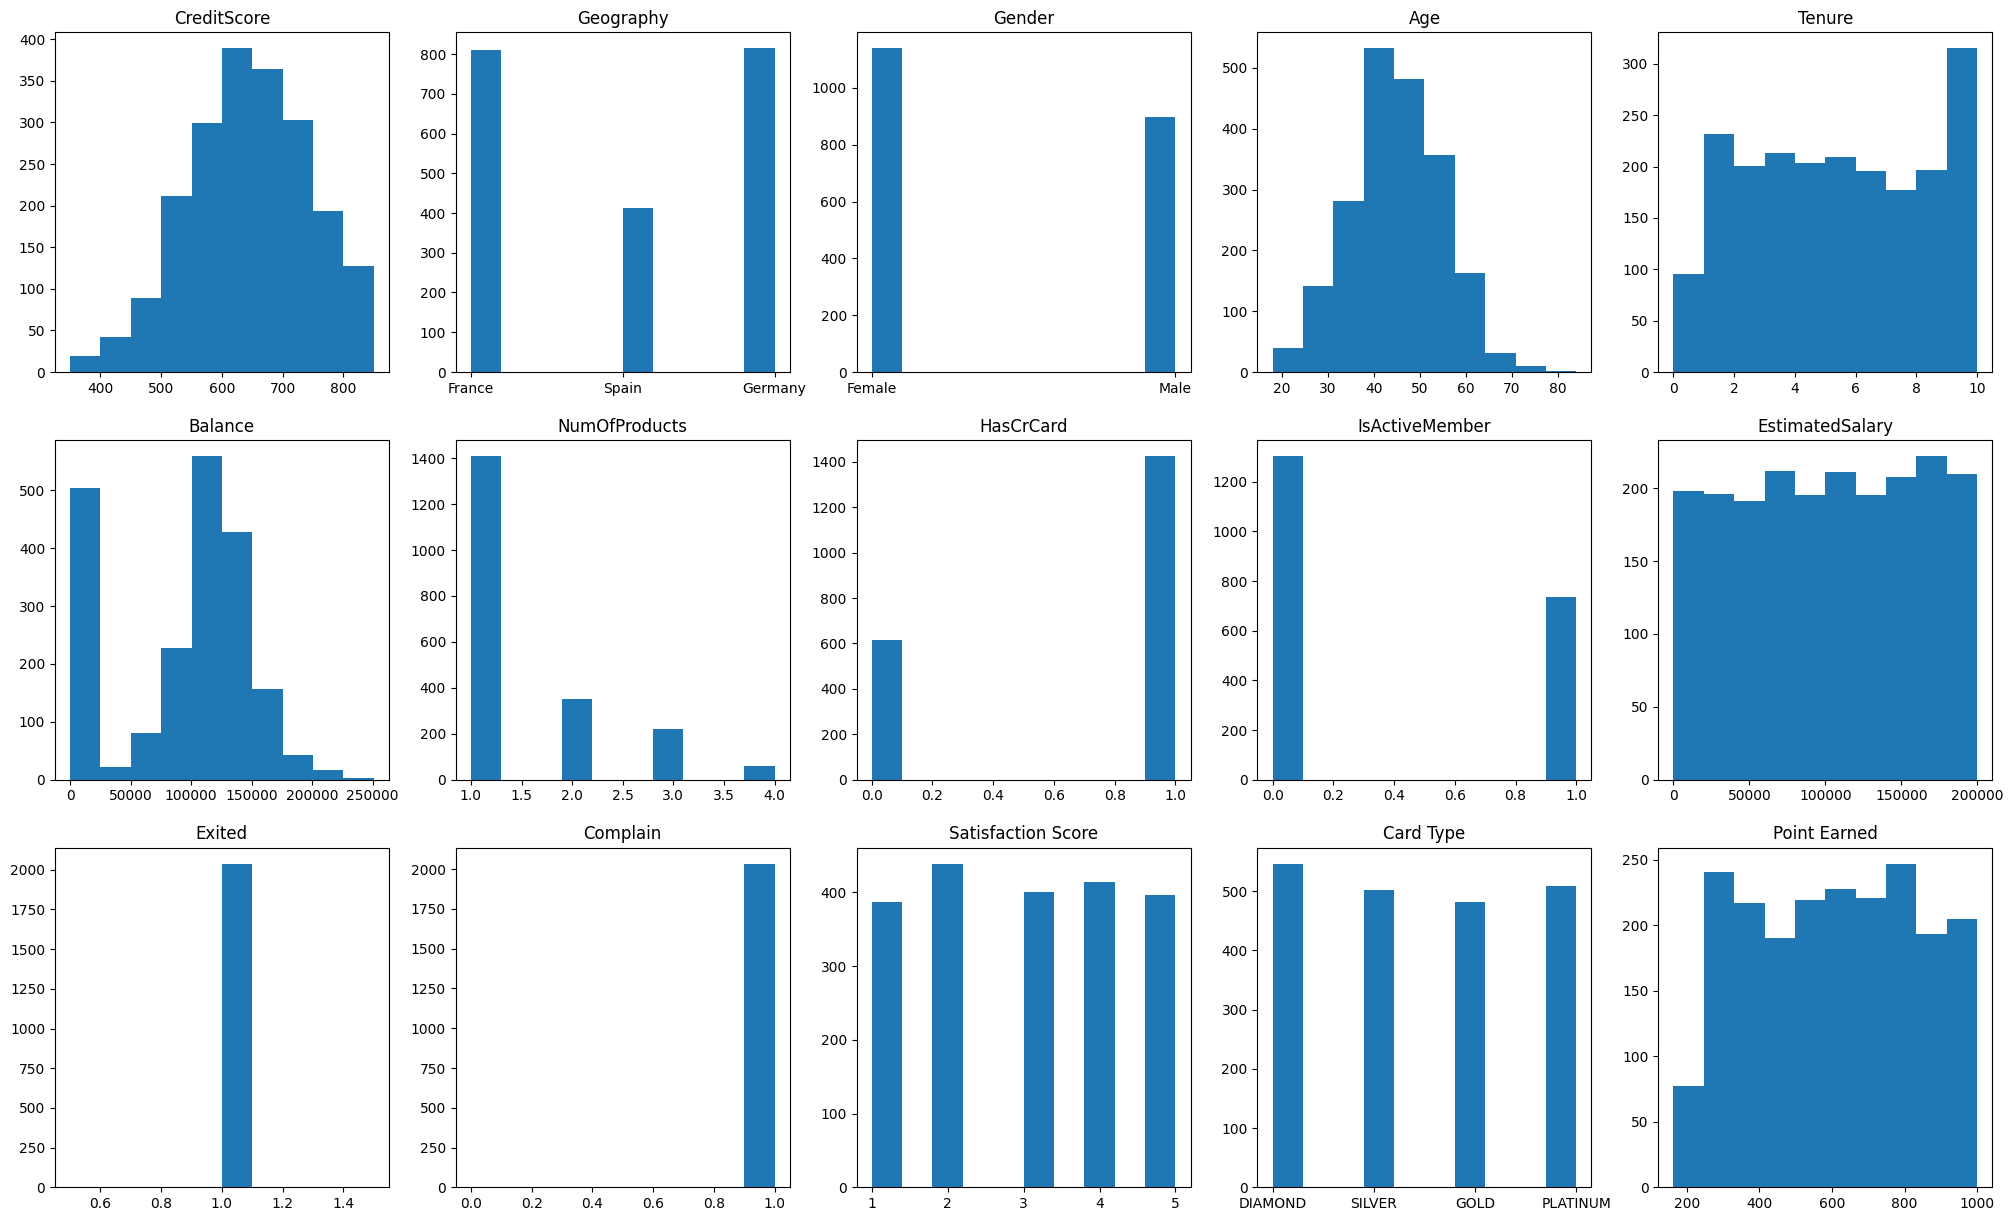

In [12]:
fig,ax=plt.subplots(3,5,figsize=(25,15))
x=0
for i in range(3):
  for j in range(5):
    if x<len(df.columns):
      ax[i][j].hist(exited[df.columns[x]])
      ax[i][j].set_title(df.columns[x])
      x+=1
plt.show()

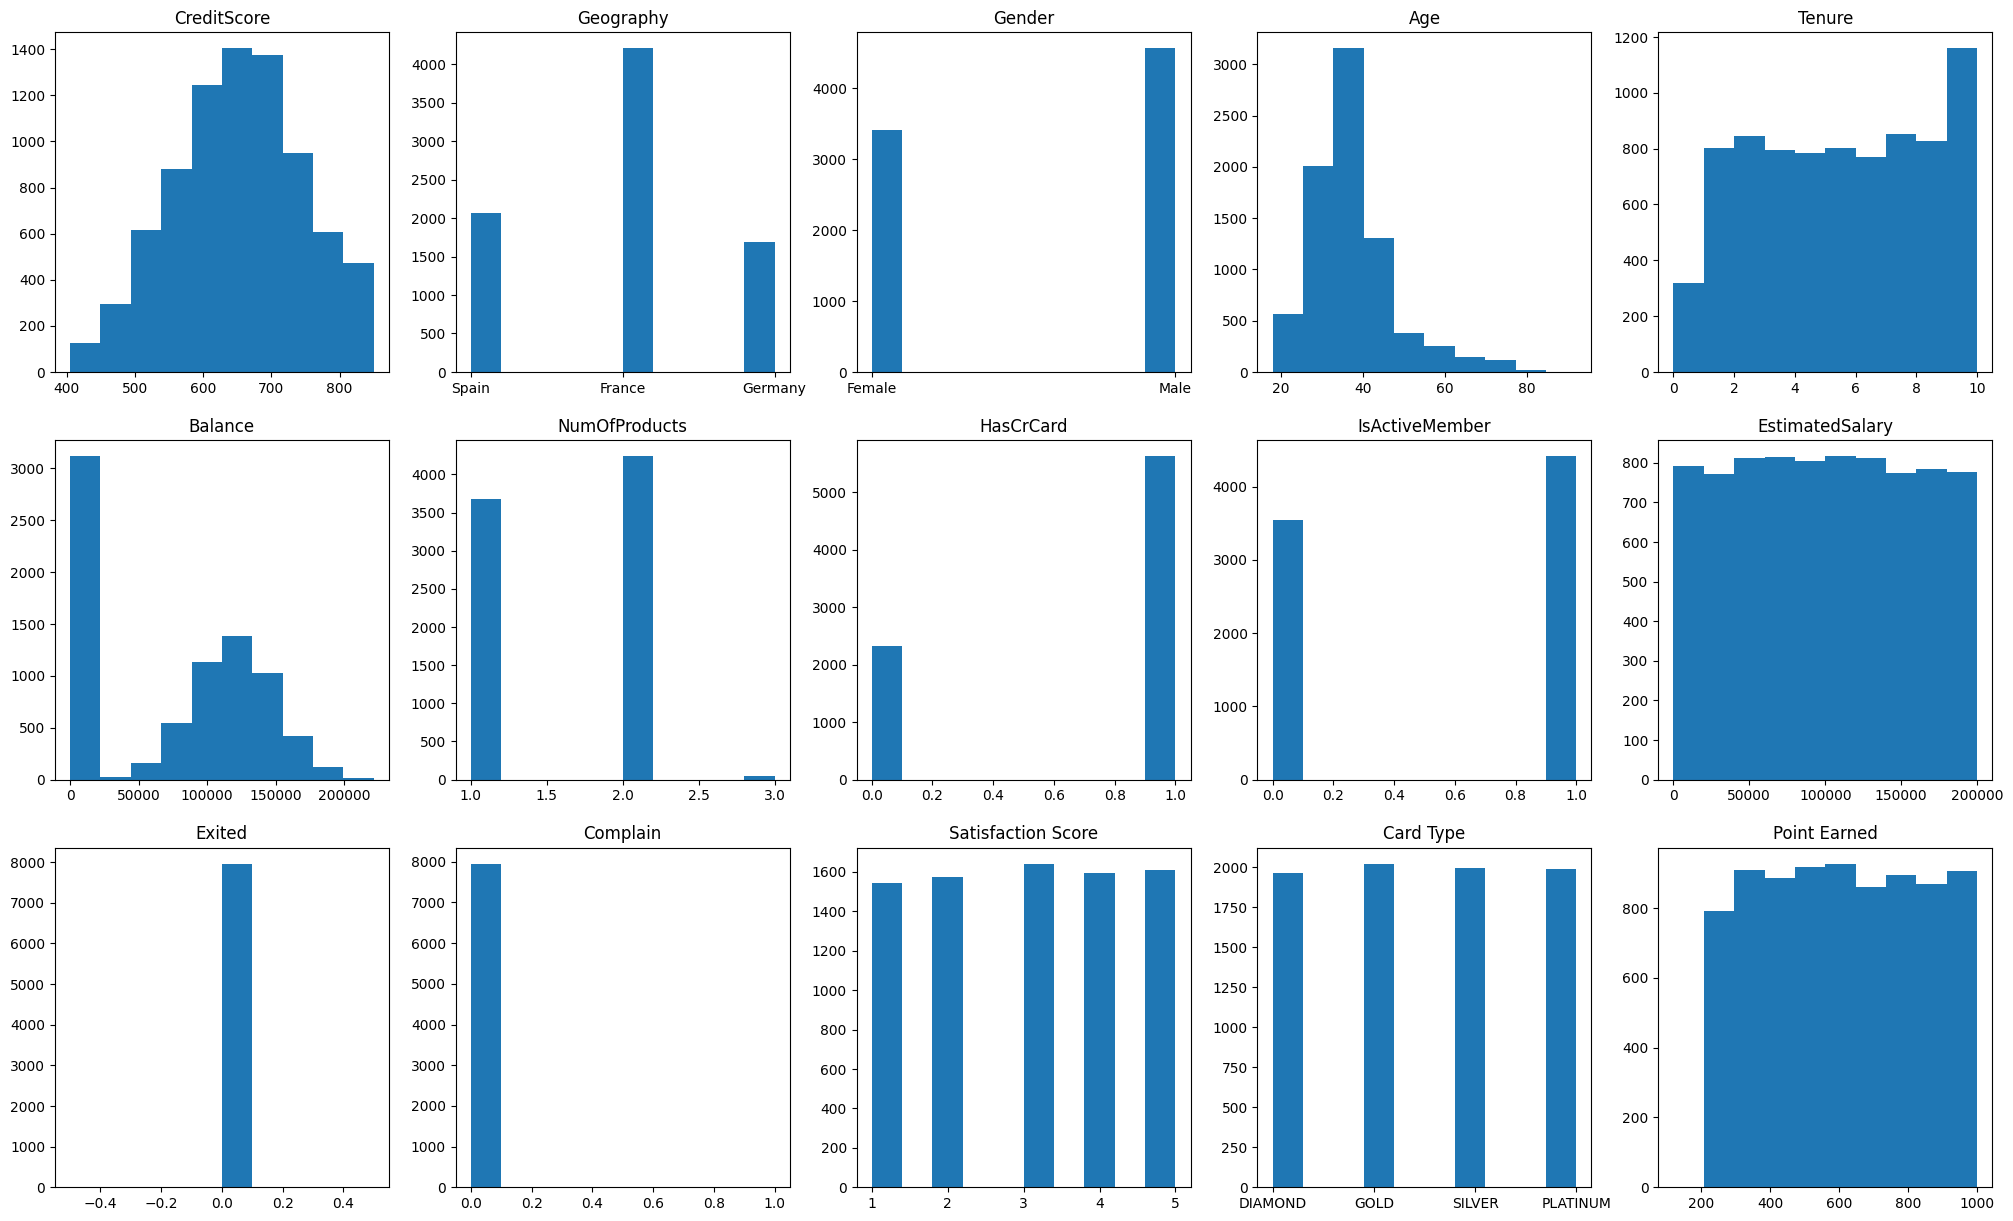

In [13]:
fig,ax=plt.subplots(3,5,figsize=(25,15))
x=0
for i in range(3):
  for j in range(5):
    if x<len(df.columns):
      ax[i][j].hist(not_exited[df.columns[x]])
      ax[i][j].set_title(df.columns[x])
      x+=1
plt.show()

It is seen that the Complain column is an important factor in determining whether the customer exits or not. This is followed by IsActiveMember which further determines whether a customer leaves the bank or not.

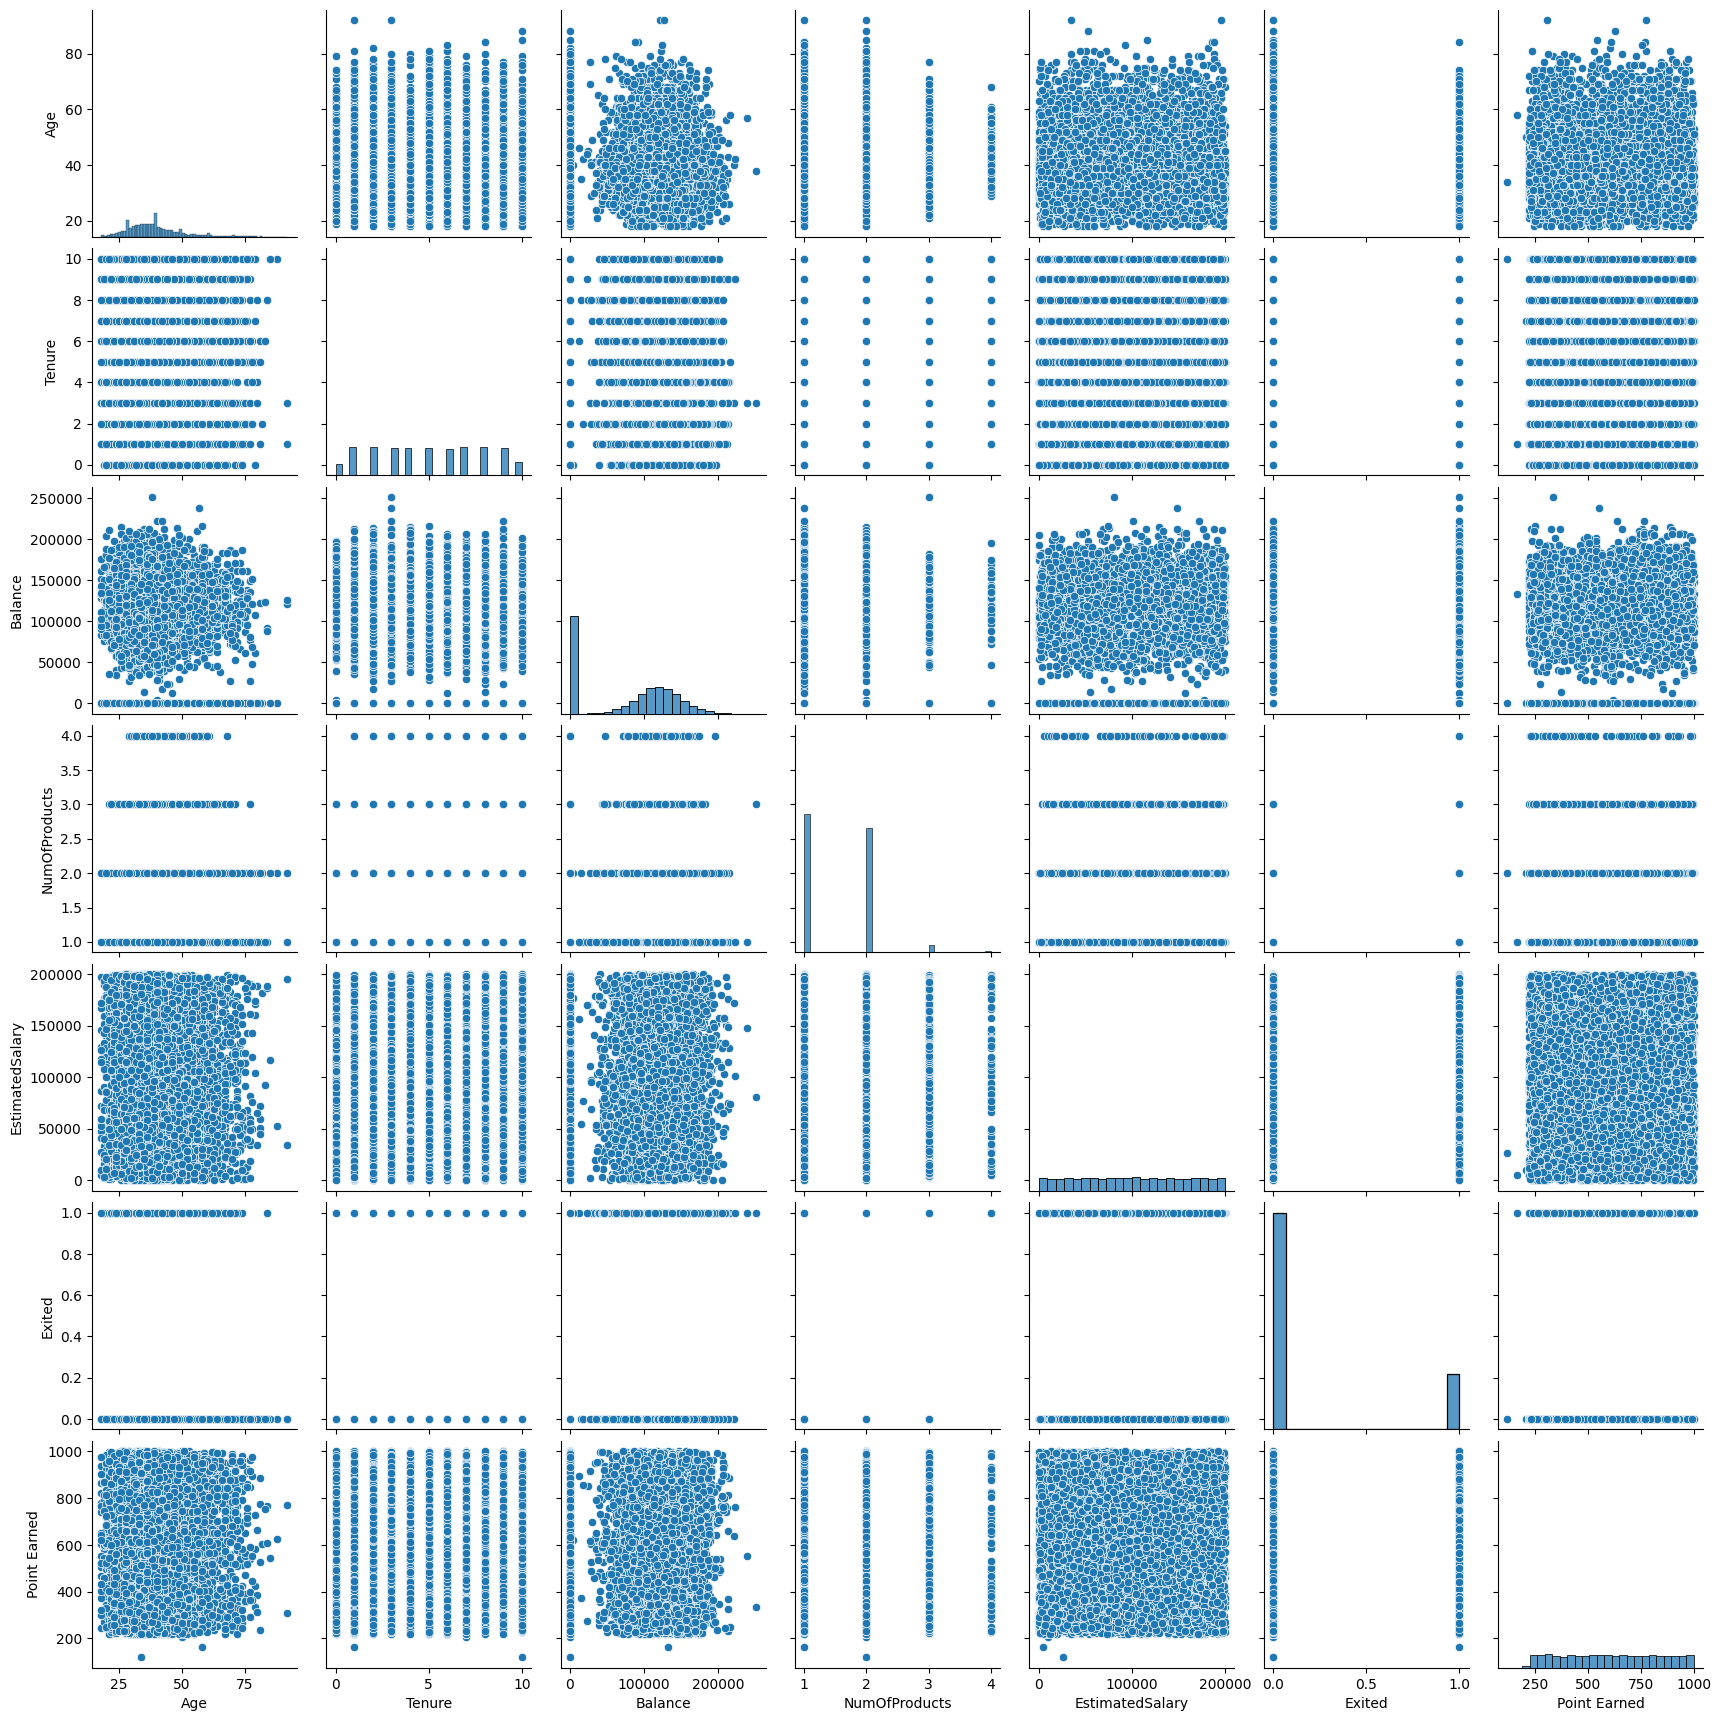

In [14]:
pure_metric=[col for col in metric if df[col].dtype==float or col in ['Age','NumOfProducts','Tenure','Point Earned','Exited']]
sns.pairplot(df[pure_metric])

In [15]:
df=pd.concat([df[metric],pd.get_dummies(df[cat],drop_first=True)],axis=1)

<ipython-input-15-01bfb5981e46>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.concat([df[metric],pd.get_dummies(df[cat],drop_first=True)],axis=1)


In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Geography_Germany,Geography_Spain,Gender_Male,Satisfaction Score_2,Satisfaction Score_3,Satisfaction Score_4,Satisfaction Score_5,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,0,0,0,1,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,0,1,0,0,1,0,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,0,0,0,0,1,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,0,0,0,0,1,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,1,0,0,0,0,1,1,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore           10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Tenure                10000 non-null  int64  
 3   Balance               10000 non-null  float64
 4   NumOfProducts         10000 non-null  int64  
 5   HasCrCard             10000 non-null  int64  
 6   IsActiveMember        10000 non-null  int64  
 7   EstimatedSalary       10000 non-null  float64
 8   Exited                10000 non-null  int64  
 9   Complain              10000 non-null  int64  
 10  Point Earned          10000 non-null  int64  
 11  Geography_Germany     10000 non-null  uint8  
 12  Geography_Spain       10000 non-null  uint8  
 13  Gender_Male           10000 non-null  uint8  
 14  Satisfaction Score_2  10000 non-null  uint8  
 15  Satisfaction Score_3

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop(['Exited'],axis=1)
y=df['Exited']
print(x.columns)
print(y[:10])

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Point Earned',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'Satisfaction Score_2', 'Satisfaction Score_3', 'Satisfaction Score_4',
       'Satisfaction Score_5', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')
0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [21]:
model0=XGBClassifier(learning_rate=0.01,tree_method='gpu_hist',objective='binary:logistic',random_state=42)
model0.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [22]:
y_test_pred=model0.predict(x_test)
y_train_pred=model0.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score
print("test: ",accuracy_score(y_test_pred,y_test))
print("train: ",accuracy_score(y_train_pred,y_train))

test:  0.9988
train:  0.9985333333333334


In [24]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 43.0 MB/s eta 0:00:00


Text(0.5, 0, 'Xgboost Feature Importance')

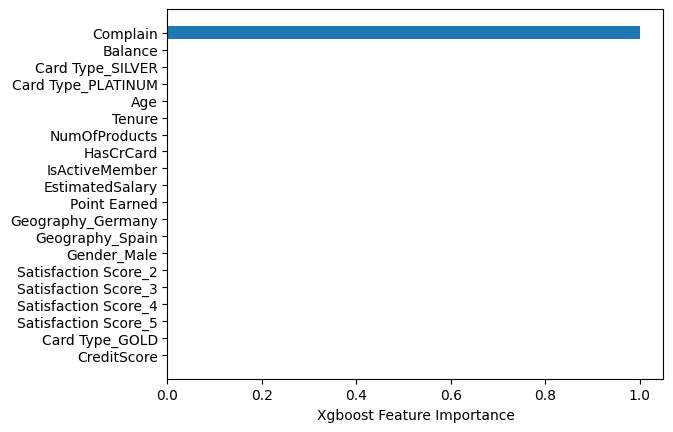

In [25]:
import shap
sorted_idx = model0.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model0.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

Without Complain column

In [26]:
x=df.drop(['Exited','Complain'],axis=1)
y=df['Exited']
print(x.columns)
print(y[:10])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Point Earned',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'Satisfaction Score_2', 'Satisfaction Score_3', 'Satisfaction Score_4',
       'Satisfaction Score_5', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')
0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64


In [27]:
model1=XGBClassifier(learning_rate=0.01,tree_method='gpu_hist',objective='binary:logistic',random_state=42)
model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [28]:
y_test_pred=model1.predict(x_test)
y_train_pred=model1.predict(x_train)

In [29]:
print("test: ",accuracy_score(y_test_pred,y_test))
print("train: ",accuracy_score(y_train_pred,y_train))

test:  0.8692
train:  0.8678666666666667


In [36]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 11.2 MB/s eta 0:00:00


In [38]:
from skopt import BayesSearchCV

In [63]:
params={
    'max_depth': (3,15),
    'n_estimators':(100,1000),
    'min_child_weight':(0.1,1.0),
    'subsample':(0.1,1.0)
}
model2=XGBClassifier(learning_rate=0.01,tree_method='gpu_hist',objective='binary:logistic',random_state=42)
search=BayesSearchCV(model2,params,n_jobs=-1,random_state=42)

In [64]:
search.fit(x_train,y_train)

BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=0.01, max_...
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None, predictor=None,
                                      random_state=42, ...),
              n_jobs=-1, random_state=42,
              search_spaces={'max_depth': (3, 15),
                             'min_child_weight': (0.1, 1.0),
                             'n_estimators': (100, 1000),
                             'subsample': (0.1, 1.0)})

In [65]:
print("val. score: %s" % search.best_score_)
print("test score: %s" % search.score(x_test, y_test))
print("best params: %s" % str(search.best_params_))

val. score: 0.8624
test score: 0.8684
best params: OrderedDict([('max_depth', 8), ('min_child_weight', 0.9268502695024393), ('n_estimators', 194), ('subsample', 0.4899995216832027)])


In [66]:
y_test_pred=search.predict(x_test)
y_train_pred=search.predict(x_train)
print("test: ",accuracy_score(y_test_pred,y_test))
print("train: ",accuracy_score(y_train_pred,y_train))

test:  0.8684
train:  0.894


In [68]:
model_fin=XGBClassifier(learning_rate=0.01,n_estimators=194,tree_method='gpu_hist',objective='binary:logistic',max_depth=8,
                        min_child_weight=0.9268502695024393,subsample=0.4899995216832027,random_state=42)
model_fin.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=0.9268502695024393, missing=nan,
              monotone_constraints=None, n_estimators=194, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [69]:
y_test_pred=model_fin.predict(x_test)
y_train_pred=model_fin.predict(x_train)
print("test: ",accuracy_score(y_test_pred,y_test))
print("train: ",accuracy_score(y_train_pred,y_train))

test:  0.8684
train:  0.894


Text(0.5, 0, 'Xgboost Feature Importance')

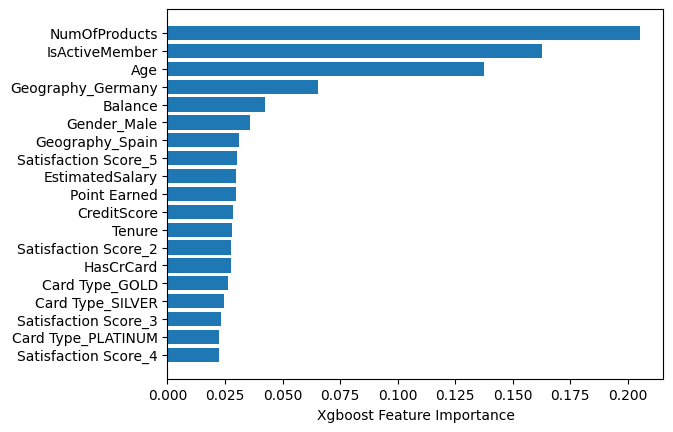

In [70]:
sorted_idx = model_fin.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], model_fin.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")